# Machine Learning Project

### Case Study Selection 
I will be working on the case study -  Use of Graphical models for classification tasks. The project should involve learning parameters and/or the structure of the model from data using Cleveland Clinic heart disease dataset.

## 1. Aims, objectives and plan

### a) Aims and objectives
#### Aim
The aim of the project is to build a graphical model using Bayesian Belief Network to identify whether a patient has heart disease or not. The dataset used is Cleveland Clinic heart disease dataset. The dataset consists of 303 records across 14 attributes with one of the attribute showing presence (1,2,3,4) or absence (0) of heart disease. The graphical model will be used for classification. I will also be learning parameters and structure of the model from data. So the two techniques that I will be discussing in this project will be:

- Technique 1: Learning parameters on a given model structure
- Technique 2: Learning the structure of the model from data
 
Below are the main steps I will pe performing:

i. The dataset will be inspected for data quality, issues like missing values and conversion of attribute values from continuous to discrete etc. will be handled.

ii. Learning model parameters using MaximumLikelihood Estimator and Bayesian Estimator. The hyperparameters will be tuned and the resulting best model on the basis of log likelihood score will be trained.

iii. Learning the structure of the network using Hill-Climb Search Algorithm. Different scoring methods will be evaluated to get the best network structure. We will then be learning the CPTs from the data and model will be trained.

iv. Testing will be performed on the models identified in ii. and iii. and the best model will be identified using appropriate performance metrics.

#### Objective
Objective 1: To develop a graphical model using Bayesian Belief Network to classify whether a patient has heart disease or not

Objective 2: Learn the model parameters using different techniques like Maximum Likelihood Estimator and Bayesian Estimator

Objective 3: Learn the structure of the network using different scoring techniques of Hill-Climb Search Algorithm

###  b) Plan
Below is the Gantt Chart of the plan

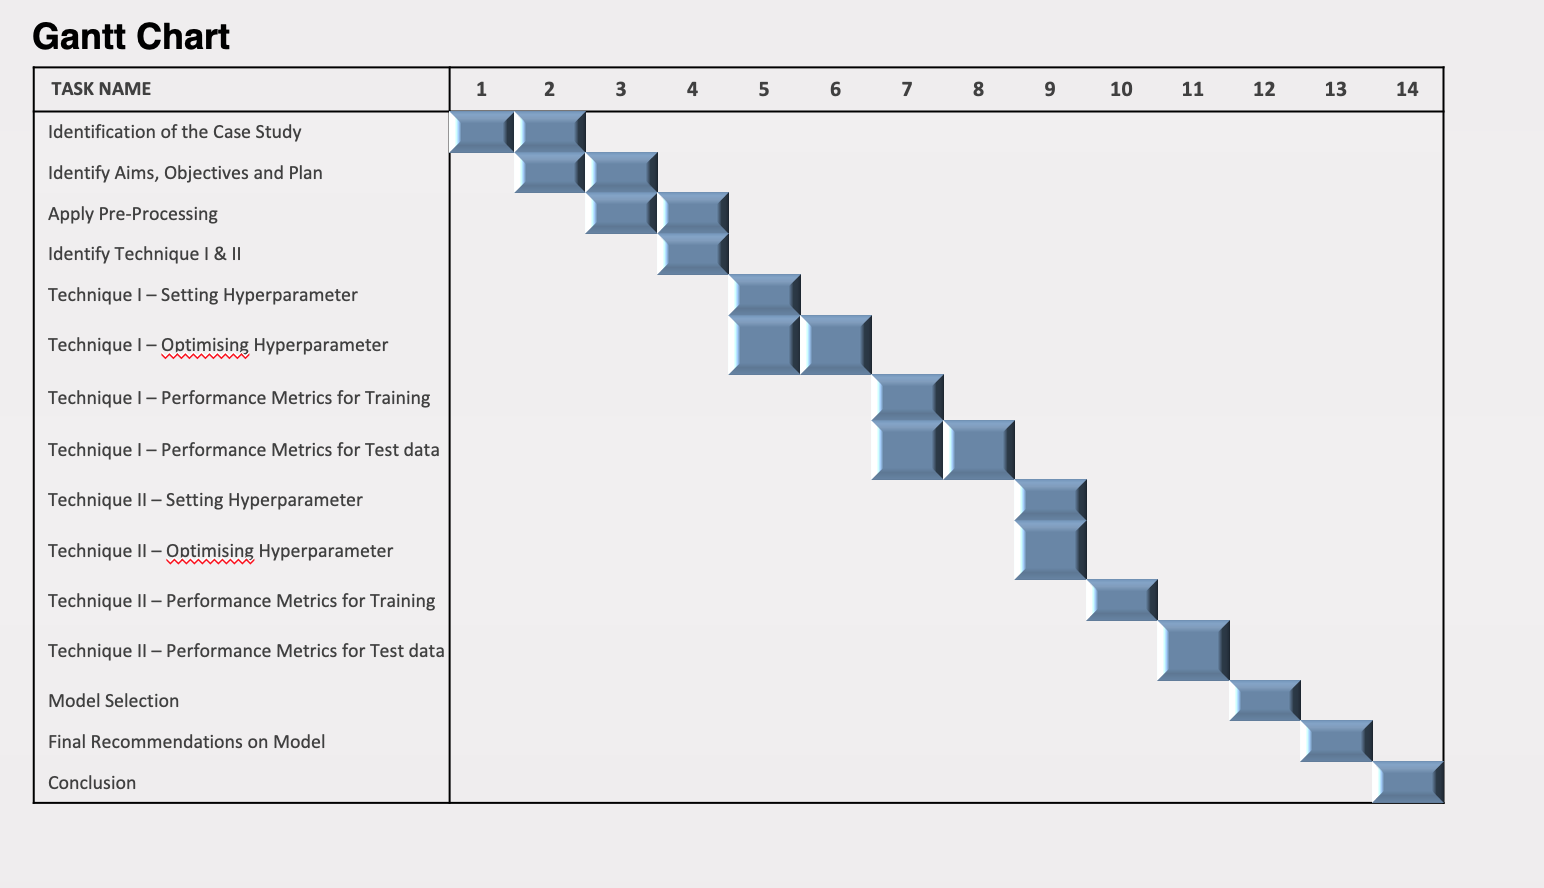


## 2. Understanding the case study

###  Case study analysis

For the case study we are using the Cleveland Clinic Heart Disease dataset in .csv format from [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/). The dataset consists of 303 records with 14 attributes. The attribute descriptions will be discussed in next section. The key points that I found in the dataset are below:

1. <b>Target Attribute </b>- The target attribute has 5 categories - 0 for absence of heart disease and 1 to 4 indicating degree of heart disease. I will be converting this to a binary classification problem by converting 2,3,4 also to 1 indicating presence of heart disease.

2. <b> 5 Continuous Attributes </b>- There are 5 attributes that have continuous values. Since we will be using bayesian belief network, all the attributes should be discrete in nature, so we will be doing a conversion.

3. <b> Learning Model Parameters </b>- I will be using an already available heart disease graphical model used in the research paper (Muibideen, Mistura & Prasad, Dr. (2020). A Fast Algorithm for Heart Disease Prediction using Bayesian Network Model) and learning the parameters using Bayesian Estimator and Maximum Likelihood Estimation on the dataset. I will be computing the loglikelihood and determining which estimator is better for learning the model.

4. <b> Learning Network Structure </b>- I will be learning the network using Hill-Climb Search Algorithm using different scoring techniques and identify the best structure on the basis of the scores. Post that will be training the model to learn CPTs from the dataset.

I will be testing the trained model structures and identify the best network structure and resulting model parameters and use the final model to predict heart disease.

## Loading the Dataset and Importing Modules

### Modules to be Imported

The below modules are imported to perform the tasks identified above.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split

import networkx as nx

from pgmpy.estimators import BayesianEstimator
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import K2Score
from pgmpy.estimators import BDeuScore
from pgmpy.estimators import BicScore

from pgmpy.models import BayesianModel

from pgmpy.metrics import log_likelihood_score

## 3. Dataset description 

We have used the Cleveland Clinic Heart Disease dataset in .csv format from UCI Machine Learning repository (https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/). The dataset consists of 303 records with 14 attributes. 

Below are the details of the attributes:

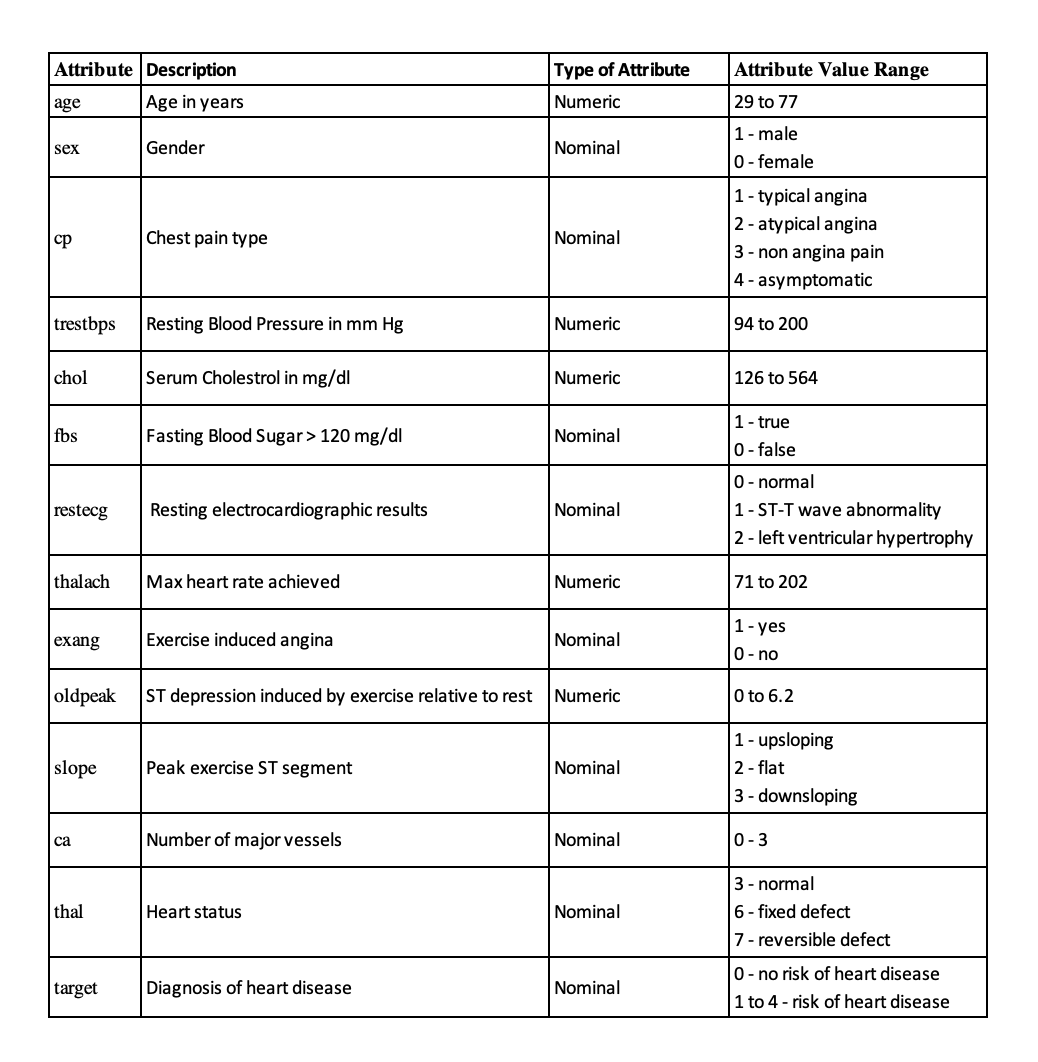

### Loading the Data

The ".csv" file is converted into a pandas dataframe for further processing and analysis.

In [3]:
hd_data = pd.read_csv('heart_disease.csv') 
hd_data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


#### Identification of Discrete and Continuous attributes in dataset

We will be using sns.distplot to identify discrete and continuous attributes in the dataset. Since graphical models only work on discrete data hence we will need to convert the continuous ones into discrete.

Noted that the following attributes have continuous data.
1. age
2. trestbps
3. chol
4. thalach
5. oldpeak

In [4]:
columns = [col for col in hd_data]

In [5]:
def univariate_plot(df,columns):
    fig, ax = plt.subplots(len(columns), 1, figsize = (10, 20))
    for idx, column in enumerate(columns):
        sns.distplot(df[column], ax = ax[idx])
    plt.tight_layout()

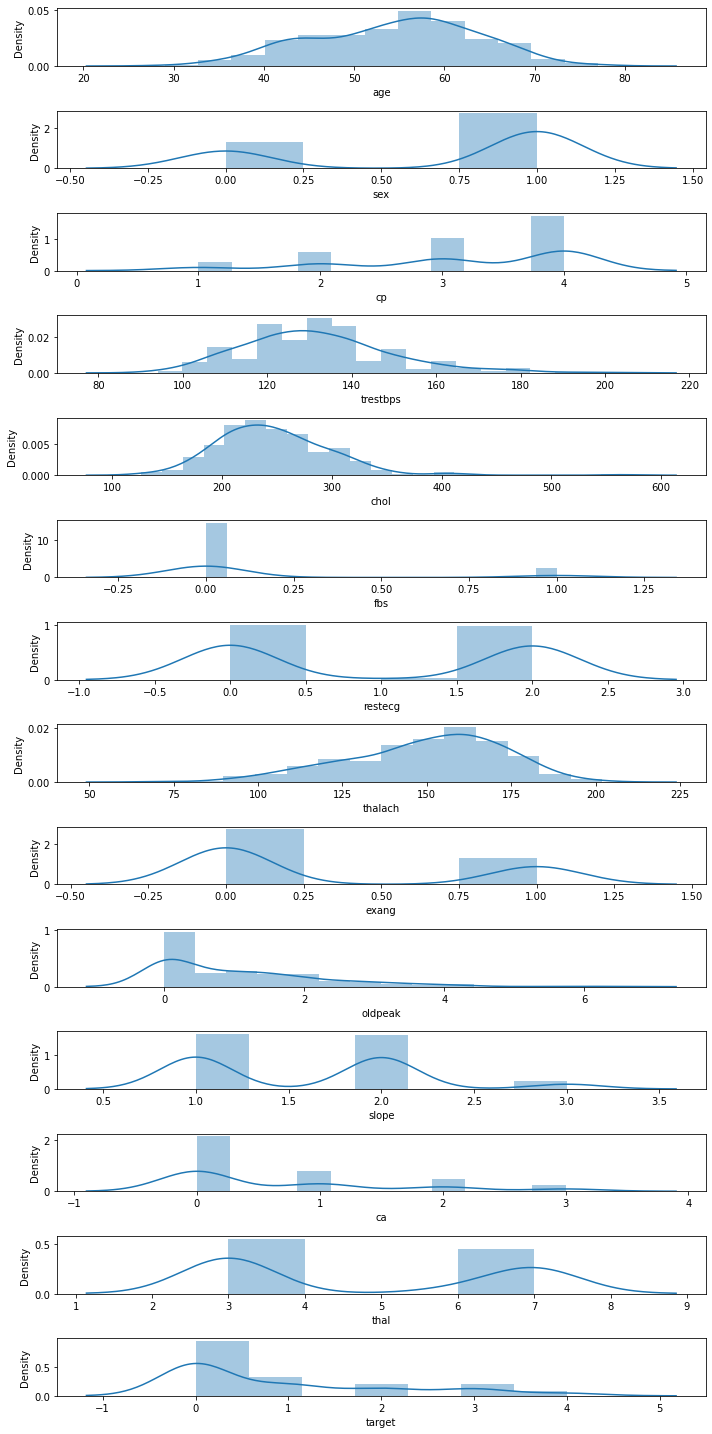

In [6]:
univariate_plot(hd_data, columns)

### Pre-processing applied

Refer to the sections below to understand the pre-processing applied. 

#### Dealing with missing values

Below is the basic information of the data.

In [7]:
hd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


Noted that there are a total of 14 columns, out of which 'ca' has 4 missing values and 'thal' has 2 missing values. 

We will be deleting these rows so that the sanctity of the data is maintained. Therefore, the dataset will now have 297 rows.

In [8]:
hd_data = hd_data.dropna()
hd_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.8 KB


#### Dealing with data type conversion

Noted that there are 3 attributes that have datatype as float, however, only oldpeak should be float, hence we will be fixing the data type and coverting it to int.

In [9]:
hd_data['ca'] = hd_data['ca'].apply(np.int64)
hd_data['thal'] = hd_data['thal'].apply(np.int64)

In [10]:
hd_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    int64  
 12  thal      297 non-null    int64  
 13  target    297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 34.8 KB


#### Target Class Transformation

Noted that the target class i.e. presence of heart disease has 5 values.

- 0 - absence of heart disease

- 1 to 4 - indicating presence and degree of heart disease

For the purpose of this analysis we will be converting the target class into a binary classification problem. We will be replacing the values of 2,3,4 to 1 to indicate presence of heart disease.

In [11]:
hd_data.target.unique()

array([0, 2, 1, 3, 4])

In [12]:
hd_data['target']=hd_data['target'].replace([2, 3, 4], 1)
hd_data.target.unique()

array([0, 1])

#### Conversion of Continuous Attributes to Discrete

We identified 5 columns with continuous data - age, trestbps, chol, oldpeak and thalach. Below we will be looking at the minimum and maximum values for each of these columns and converting it to discrete values.

In [13]:
hd_data.describe(include='all') 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


#### Conversion of trestbps 
Based on expert [recommendation](https://www.cdc.gov/bloodpressure/about.htm), noted the below and based on it will be doing the conversion from continuous to discrete.

* 0-119       -> 0 (Normal)

* 120-129     -> 1 (Elevated)

* 130 & Above -> 2 (High)


In [14]:
hd_data['trestbps']=pd.cut(hd_data['trestbps'],[0,119,129,250],labels = [0,1,2])

#### Conversion of chol 

Based on expert [recommendation](https://my.clevelandclinic.org/health/articles/11920-cholesterol-numbers-what-do-they-mean), noted the below and based on it will be doing the conversion from continuous to discrete.

* 0-199 -> 0 (Normal) 
* 200-238 -> 1 (Borderline) 
* 239 & Above -> 2 (High)

In [15]:
hd_data['chol']=pd.cut(hd_data['chol'],[0,199,238,600],labels = [0,1,2])

#### Conversion of thalach
Based on expert [recommendation](https://www.cdc.gov/physicalactivity/basics/measuring/heartrate.htm), noted the below and based on it will be doing the conversion from continuous to discrete.

Max heart rate achieved = 220 - age

If achieved then thalach = 1 else 0

In [16]:
hd_data['thalach']= (220 - hd_data['age']) < hd_data['thalach']

In [17]:
hd_data['thalach']=hd_data['thalach'].replace([True,False], [1,0])

#### Conversion of oldpeak
Based on expert [recommendation](https://en.wikipedia.org/wiki/ST_depression), noted the below and based on it will be doing the conversion from continuous to discrete.

* 0-2 -> 0 (irreversible ischaemia) 
* 2 & Above -> 1 (reversible ischaemia) 

In [18]:
hd_data['oldpeak']=pd.cut(hd_data['oldpeak'],[-1,1.99,7],labels = [0,1])

#### Conversion of Age 

Based on expert [recommendation](https://en.wikipedia.org/wiki/Middle_age), noted the below and based on it will be doing the conversion from continuous to discrete.

* 0-44 -> 0 (Young)
* 45-64 -> 1 (Middle)
* 65 & Above -> 2 (Old)

In [19]:
hd_data['age']=pd.cut(hd_data['age'],[0,44,64,100],labels = [0,1,2])

Converting all the data types to type category

In [20]:
for col in ['sex', 'cp', 'fbs', 'restecg', 'thalach','exang','slope','ca','thal','target']:
    hd_data[col] = hd_data[col].astype('category')

In [21]:
hd_data.describe(include = 'all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297,297,297,297,297,297,297,297,297,297,297,297,297,297
unique,3,2,4,3,3,2,3,2,2,2,3,4,3,2
top,1,1,4,2,2,0,0,0,0,0,1,0,3,0
freq,203,201,142,165,159,254,147,232,200,238,139,174,164,160


#### Split the Data
Since the pre-processing is complete, we will be splitting the data into train and test, where test size is 20% of the data. We will be removing the target column from the dataset and assigning it to y, target vector.

In [22]:
X = hd_data.iloc[:,0:-1]
y = hd_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

For training Bayesian Belief Network, we need to have both the target vector and attributes in a single dataframe, hence we will be combining them

In [23]:
hd_data_train = pd.concat([X_train, y_train],axis = 1)
hd_data_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
277,0,0,3,2,1,0,0,0,0,0,2,0,3,0
262,1,0,1,2,2,0,0,1,0,0,1,0,3,0
30,2,0,1,2,2,0,0,0,0,0,1,2,3,0
22,1,1,2,1,2,0,2,0,0,0,2,0,3,1
281,1,1,3,2,2,0,0,1,0,0,1,0,3,0


## 4. Technique

### a) Discuss your motivation for choosing the technique and provide a schematic figure of the process 

We noted the below characteristics of the data:
-  Class/Label is present, hence, Supervised Learning
-  Class/Label is Binominal/Binary
-  9 out of 14 attributes are discrete and 5 are continuous, which have also been converted into discrete

While keeping the above points in mind, the case study is essentially a supervised learning binominal classification problem. We can use various Machine Learning models like Logistic Regression, graphical models, SVM, Neural Network etc to solve this problem.

While doing my research, I noted that although graphical models have a lot of potential to correctly classify a disease based on symptoms/parameters they have not been used a lot and everyone mainly uses logistic regression, SVM or neural networks, hence decided to work on solving this case study using Bayesian Belief Networks. 

The Bayesian Belief Network gives us a graphical relationship between different attributes and target variables. It gives us a directed graph which can be visualised and, so it is easy to comprehend as well. It also helps us understand which attributes have no relationship with the target variable.

A graphical model for the inter-relationship between the heart disease and health parameters is already used in the [research paper](https://www.researchgate.net/publication/347442332_A_Fast_Algorithm_for_Heart_Disease_Prediction_using_Bayesian_Network_Model)(Muibideen, Mistura & Prasad, Dr. (2020). A Fast Algorithm for Heart Disease Prediction using Bayesian Network Model). We will be using the model given in the research paper and use it to learn the model parameters based on health records.

<b>Bayesian Estimator using BDeu, dirichlet and K2 prior type will be used for learning the model along with Maximum Likelihood Estimator.</b> The performance of all of these will be measured using loglikelihood and best model parameters will be identified for the model structure given in research paper. 

Schematic Figure of Process
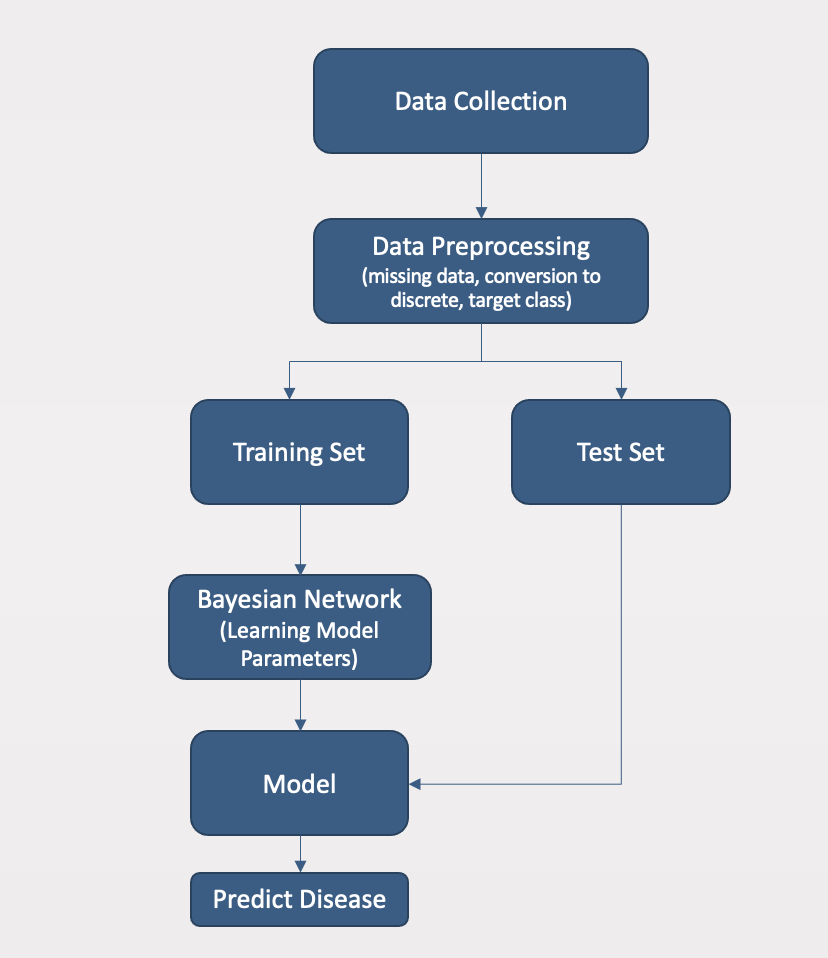

<b>Model Structure from Research paper</b>
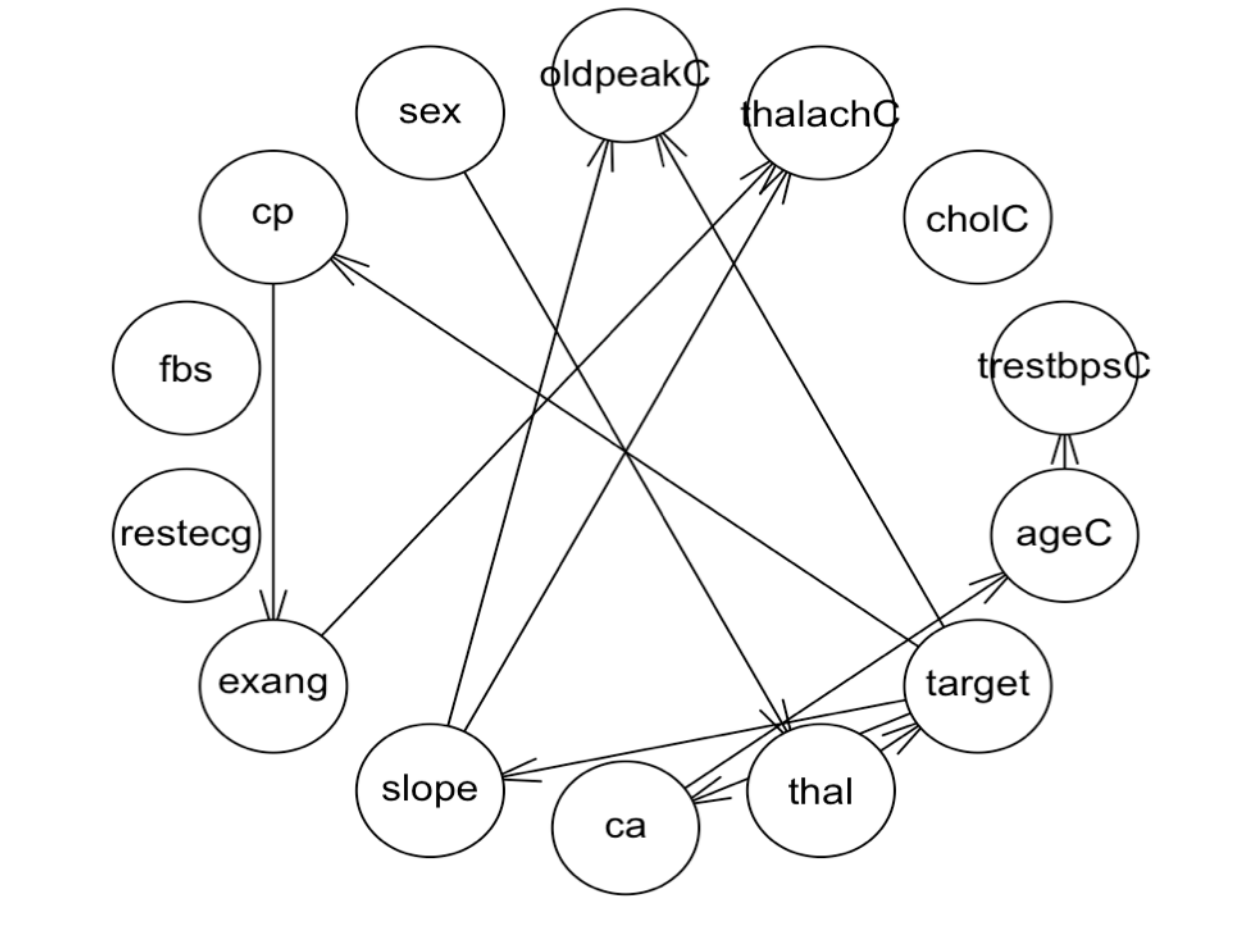

#### Creating the Bayesian Model for Heart Disease on the basis of the model structure given in the research paper

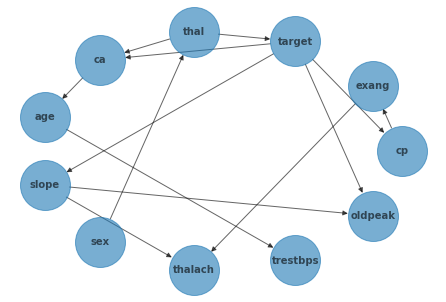

In [24]:
research_model = BayesianModel([('cp', 'exang'), ('target', 'cp'),('thal', 'target'), ('thal', 'ca'),('ca', 'age'),('target', 'slope'),('target', 'ca'),('ca', 'age'), ('sex', 'thal'), ('exang', 'thalach'),('age', 'trestbps'),('slope', 'thalach'),('slope', 'oldpeak'), ('target', 'oldpeak')])
nx.draw_circular(research_model, with_labels=True, arrowsize=10, node_size=2500, alpha=0.6, font_size = 10, font_weight='bold')
plt.show()

In [25]:
#Displaying the nodes of the model

research_model.nodes()

NodeView(('cp', 'exang', 'target', 'thal', 'ca', 'age', 'slope', 'sex', 'thalach', 'trestbps', 'oldpeak'))

Based on the nodes in the model, noted that 'chol', 'fbs' and 'restecg' are not a part of the graphical model. Hence we will be removing the nodes from the dataframe hd_data_train and calling it hd_data_hp for hyperparameter tuning.

In [26]:
hd_data_hp = hd_data_train.copy()
hd_data_hp.drop(['chol', 'fbs', 'restecg'],axis=1, inplace=True)

### b) Setting hyper parameters (rationale)

For Bayesian Belief Network, we will learn the model parameters using two estimators:

1. Maximum Likelihood Estimator - Estimates for the CPDs using the relative frequencies with which the variable states have occured. 
2. Bayesian Estimator - It starts with already existing prior CPDs, that express our beliefs about the variables before the data was observed. The “priors” are then updated, using the state counts from the observed data. 

<b> Maximum Likelihood Estimator </b> does not have any hyperparameters.

<b> Bayesian Estimator </b> has hyperparameters which are discussed below:
* prior_type - BDeu -> equivalent_sample_size - will be selected in hyperparameter tuning
* prior_type - dirichlet -> pseudo_counts - will be selected in hyperparameter tuning
* prior_type - K2 -> no hyperparameter

#### Maximum Likelihood Estimator

In [27]:
MLE_research_model = research_model #copying the model structure for learning CPTs

In [28]:
#Learning CPTs
MLE_research_model.cpds = []
MLE_research_model.fit(data=hd_data_train, 
          estimator=MaximumLikelihoodEstimator)

print(f'Check model: {MLE_research_model.check_model()}\n')
for cpd in MLE_research_model.get_cpds():
    print(f'CPT of {cpd.variable}:')
    print(cpd, '\n')

Check model: True

CPT of cp:
+--------+---------------------+---------------------+
| target | target(0)           | target(1)           |
+--------+---------------------+---------------------+
| cp(1)  | 0.10483870967741936 | 0.05309734513274336 |
+--------+---------------------+---------------------+
| cp(2)  | 0.20967741935483872 | 0.07079646017699115 |
+--------+---------------------+---------------------+
| cp(3)  | 0.41935483870967744 | 0.13274336283185842 |
+--------+---------------------+---------------------+
| cp(4)  | 0.2661290322580645  | 0.7433628318584071  |
+--------+---------------------+---------------------+ 

CPT of exang:
+----------+---------------------+-----+--------------------+
| cp       | cp(1)               | ... | cp(4)              |
+----------+---------------------+-----+--------------------+
| exang(0) | 0.8947368421052632  | ... | 0.4188034188034188 |
+----------+---------------------+-----+--------------------+
| exang(1) | 0.10526315789473684 | ... 

In [29]:
#calculating log likelihood score
MLE_llh = log_likelihood_score(MLE_research_model, hd_data_hp)

### c) Optimising hyper parameters 

We will be using for loop to search through best equivalent sample size and pseudo count hyper parameter for BDeu and dirichlet prior_type respectively.

#### prior_type - BDeu -> equivalent_sample_size to be determined

Noted that log likelihood is maximum at equivalent_sample_size = 22.

In [30]:
bdeu_research_model = research_model #copying the model structure for learning CPTs

In [31]:
#Identifying value for hyper paramter equivalent sample size
maxi = -2000

for x in range (1,50):
    bdeu_research_model.cpds = []
    bdeu_research_model.fit(data=hd_data_train, 
              estimator=BayesianEstimator,
              prior_type="BDeu",
              equivalent_sample_size=x)
    z = log_likelihood_score(bdeu_research_model, hd_data_hp)
    if z > maxi:
        maxi = z
        esz=x
        
print("The log likelihood score is maximum at equivalent sample size: ", esz)

The log likelihood score is maximum at equivalent sample size:  22


In [32]:
#Learning CPTs for equivalent sample size identified above
bdeu_research_model.cpds = []
bdeu_research_model.fit(data=hd_data_train, 
          estimator=BayesianEstimator,
          prior_type="BDeu",
          equivalent_sample_size=esz)

print(f'Check model: {bdeu_research_model.check_model()}\n')
for cpd in bdeu_research_model.get_cpds():
    print(f'CPT of {cpd.variable}:')
    print(cpd, '\n')

Check model: True

CPT of cp:
+--------+---------------------+---------------------+
| target | target(0)           | target(1)           |
+--------+---------------------+---------------------+
| cp(1)  | 0.11666666666666667 | 0.07056451612903226 |
+--------+---------------------+---------------------+
| cp(2)  | 0.21296296296296297 | 0.08669354838709678 |
+--------+---------------------+---------------------+
| cp(3)  | 0.40555555555555556 | 0.1431451612903226  |
+--------+---------------------+---------------------+
| cp(4)  | 0.26481481481481484 | 0.6995967741935484  |
+--------+---------------------+---------------------+ 

CPT of exang:
+----------+---------------------+-----+---------------------+
| cp       | cp(1)               | ... | cp(4)               |
+----------+---------------------+-----+---------------------+
| exang(0) | 0.8061224489795918  | ... | 0.42244897959183675 |
+----------+---------------------+-----+---------------------+
| exang(1) | 0.19387755102040816 |

In [33]:
#calculating log likelihood score
bdeu_llh = log_likelihood_score(bdeu_research_model, hd_data_hp)

#### prior_type - dirichlet -> pseudo_counts to be determined

Noted that log likelihood is maximum at pseudo_counts = 2

In [34]:
dirichlet_research_model = research_model #copying the model structure for learning CPTs

In [35]:
#Identifying value for hyper paramter pseudo_counts
maxi = -2000

for x in range (1,50):
    dirichlet_research_model.cpds = []
    dirichlet_research_model.fit(data=hd_data_train, 
              estimator=BayesianEstimator,
              prior_type="dirichlet",
              pseudo_counts=x)
    z = log_likelihood_score(dirichlet_research_model, hd_data_hp)
    if z > maxi:
        maxi = z
        pc=x
        
print("The log likelihood score is maximum at pseudo count: ", pc)

The log likelihood score is maximum at pseudo count:  2


In [36]:
#Learning CPTs for pseudo count identified above
dirichlet_research_model.cpds = []
dirichlet_research_model.fit(data=hd_data_train, 
          estimator=BayesianEstimator,
          prior_type="dirichlet",
          pseudo_counts = pc)

print(f'Check model: {dirichlet_research_model.check_model()}\n')
for cpd in dirichlet_research_model.get_cpds():
    print(f'CPT of {cpd.variable}:')
    print(cpd, '\n')

Check model: True

CPT of cp:
+--------+---------------------+---------------------+
| target | target(0)           | target(1)           |
+--------+---------------------+---------------------+
| cp(1)  | 0.11363636363636363 | 0.06611570247933884 |
+--------+---------------------+---------------------+
| cp(2)  | 0.21212121212121213 | 0.08264462809917356 |
+--------+---------------------+---------------------+
| cp(3)  | 0.4090909090909091  | 0.14049586776859505 |
+--------+---------------------+---------------------+
| cp(4)  | 0.26515151515151514 | 0.7107438016528925  |
+--------+---------------------+---------------------+ 

CPT of exang:
+----------+---------------------+-----+--------------------+
| cp       | cp(1)               | ... | cp(4)              |
+----------+---------------------+-----+--------------------+
| exang(0) | 0.8260869565217391  | ... | 0.4214876033057851 |
+----------+---------------------+-----+--------------------+
| exang(1) | 0.17391304347826086 | ... 

In [37]:
#calculating log likelihood score
dirichlet_llh = log_likelihood_score(dirichlet_research_model, hd_data_hp)

#### prior_type - K2 -> no hyperparameters


In [38]:
k2_research_model = research_model #copying the model structure for learning CPTs

In [39]:
#Learning CPTs
k2_research_model.cpds = []
k2_research_model.fit(data=hd_data_train, 
          estimator=BayesianEstimator,
          prior_type="K2")

print(f'Check model: {k2_research_model.check_model()}\n')
for cpd in k2_research_model.get_cpds():
    print(f'CPT of {cpd.variable}:')
    print(cpd, '\n')

Check model: True

CPT of cp:
+--------+-----------+---------------------+
| target | target(0) | target(1)           |
+--------+-----------+---------------------+
| cp(1)  | 0.109375  | 0.05982905982905983 |
+--------+-----------+---------------------+
| cp(2)  | 0.2109375 | 0.07692307692307693 |
+--------+-----------+---------------------+
| cp(3)  | 0.4140625 | 0.13675213675213677 |
+--------+-----------+---------------------+
| cp(4)  | 0.265625  | 0.7264957264957265  |
+--------+-----------+---------------------+ 

CPT of exang:
+----------+---------------------+-----+---------------------+
| cp       | cp(1)               | ... | cp(4)               |
+----------+---------------------+-----+---------------------+
| exang(0) | 0.8571428571428571  | ... | 0.42016806722689076 |
+----------+---------------------+-----+---------------------+
| exang(1) | 0.14285714285714285 | ... | 0.5798319327731093  |
+----------+---------------------+-----+---------------------+ 

CPT of target:
+

In [40]:
#calculating log likelihood score
k2_llh = log_likelihood_score(k2_research_model, hd_data_hp)

In [41]:
#Log likelihood score table
llh_score_table = pd.DataFrame({'Log Likelihood' : [MLE_llh, bdeu_llh, dirichlet_llh, k2_llh]},
            index=['Maximum Likelihood Estimator', 'Bayesian Estimator + BDeu', 'Bayesian Estimator + dirichlet', 'Bayesian Estimator + K2'])
llh_score_table

,Log Likelihood
Maximum Likelihood Estimator,-1981.070572
Bayesian Estimator + BDeu,-1967.936327
Bayesian Estimator + dirichlet,-1970.109899
Bayesian Estimator + K2,-1972.171023


Based on the Log Likelihood estimates it is maximum for the below:
<b>
* Bayesian Estimator 
* prior_type - 'BDeu'
* equivalent_sample_size - 22 </b>

### d) Performance metrics for training

We will be looking at performance metrics for training for Bayesian Estimator with prior_type 'BDeu' and equivalent sample size 22.

In [42]:
#removing column 'chol', 'fbs' and 'restecg' from training data as these nodes are not a part of model structure
train_predict = X_train.copy()
train_predict.drop(['chol', 'fbs', 'restecg'],axis=1, inplace=True)

#predicting the target value for training data
y_pred_train_BE = bdeu_research_model.predict(train_predict)

#calculating F1 and Accuracy Score for training data
score_F1_BE = f1_score(y_train, y_pred_train_BE)
score_A_BE = accuracy_score(y_train, y_pred_train_BE)

training_score_table = pd.DataFrame({'Bayesian Estimator' : [score_F1_BE, score_A_BE]},
            index=['F1 Score', 'Accuracy Score'])
training_score_table


,Bayesian Estimator
F1 Score,0.833333
Accuracy Score,0.848101


## 5. Technique

### a) Discuss your motivation for choosing the technique and  provide a schematic figure of the process
We noted the below characteristics of the data:
-  Class/Label is present, hence, Supervised Learning
-  Class/Label is Binominal/Binary
-  9 out of 14 attributes are discrete and 5 are continuous, which have also been converted into discrete

While keeping the above points in mind, the case study is essentially a supervised learning binominal classification problem. We can use various Machine Learning models like Logistic Regression, graphical models, SVM, Neural Network etc to solve this problem.

While doing my research, I noted that although graphical models have a lot of potential to correctly classify a disease based on symptoms/parameters they have not been used a lot and everyone mainly uses logistic regression, SVM or neural networks, hence decided to work on solving this case study using Bayesian Belief Networks. 

The Bayesian Belief Network gives us a graphical relationship between different attributes and target variables. It gives us a directed graph which can be visualised and, so it is easy to comprehend as well. It also helps us understand which attributes have no relationship with the target variable.

A graphical model for the inter-relationship between the heart disease and health parameters is already used in the [research paper](https://www.researchgate.net/publication/347442332_A_Fast_Algorithm_for_Heart_Disease_Prediction_using_Bayesian_Network_Model)(Muibideen, Mistura & Prasad, Dr. (2020). A Fast Algorithm for Heart Disease Prediction using Bayesian Network Model). We will be using the model given in the research paper and use it to learn the model parameters based on health records.

In this section, we will be learning the structure of the network from the data using Hill-Climb Search Algorithm.

<b>Hill-Climb Search Algorithm using BDeu, Bic and K2 score will be used for learning the structure of the network.</b> The network structure with best score will be selected, post that we will be learning model parameters using one of the technique covered in section 4 and training and testing the model.

Schematic Figure of Process
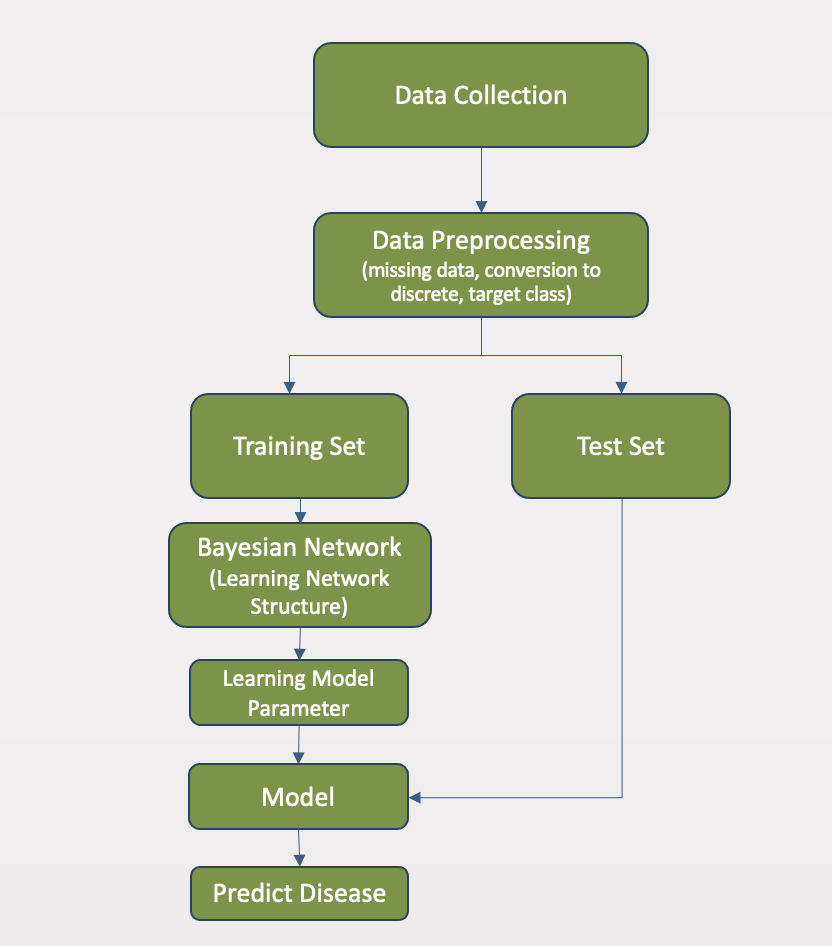

### b) Setting hyper parameters (rationale)

For Bayesian Belief Network, we will learn the structure of the network from data using Hill-Climb Search Algorithm.

Hill-Climb Search Algorithm performs local hill climb search to estimate the DAG structure that has optimal score, based on the scoring method selected. It proceeds by step-by-step network modifications until a local maximum is reached. It only estimates network structure, no parametrization. CPTs will have to be learned separately for which different techniques have already been covered in section 4. Hence, we will only be choosing one technique for the selected network structure.

<b> Hill Climb Search Algorithm </b> has hyperparameters which are discussed below:
* scoring_method - BDeu Score -> equivalent_sample_size - will be selected in hyperparameter tuning
* scoring_method - Bic Score -> no hyperparameter
* scoring_method - K2 Score -> no hyperparameter


#### scoring_method - K2 -> no hyperparameters

In [43]:
#Learning the network structure using K2 Score
scoring_method_k2 = K2Score(data=hd_data_train)
est = HillClimbSearch(data=hd_data_train)
k2_estimated_model = est.estimate(scoring_method=scoring_method_k2, max_indegree=10, max_iter=int(1e5))
print(k2_estimated_model.edges())


[('age', 'ca'), ('age', 'target'), ('cp', 'exang'), ('fbs', 'target'), ('oldpeak', 'slope'), ('slope', 'thalach'), ('ca', 'target'), ('thal', 'sex'), ('target', 'thal'), ('target', 'cp'), ('target', 'oldpeak'), ('target', 'exang'), ('target', 'slope')]


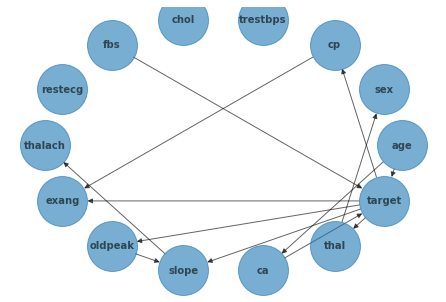

In [44]:
#Visual representation of network structure
nx.draw_circular(k2_estimated_model, with_labels=True, arrowsize=10, node_size=2500, alpha=0.6, font_size = 10, font_weight='bold')
plt.show()

In [45]:
#K2 Score for estimated model
k2_score = scoring_method_k2.score(k2_estimated_model)

#### scoring_method - Bic -> no hyperparameters

In [46]:
#Learning the network structure using Bic Score
scoring_method_bic = BicScore(data=hd_data_train)
est = HillClimbSearch(data=hd_data_train)
bic_estimated_model = est.estimate(scoring_method=scoring_method_bic, max_indegree=10, max_iter=int(1e5))
print(bic_estimated_model.edges())


[('cp', 'exang'), ('oldpeak', 'slope'), ('slope', 'thalach'), ('ca', 'target'), ('thal', 'sex'), ('target', 'thal'), ('target', 'cp'), ('target', 'oldpeak'), ('target', 'age'), ('target', 'exang')]


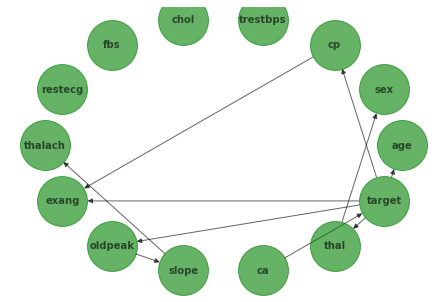

In [47]:
#Visual representation of network structure
nx.draw_circular(bic_estimated_model, with_labels=True, arrowsize=10,node_color = 'green', node_size=2500, alpha=0.6, font_size = 10, font_weight='bold')
plt.show()

In [48]:
#Bic Score for estimated model
bic_score = scoring_method_bic.score(bic_estimated_model)

### c) Optimising hyper parameters

 We will be using for loop to search through best equivalent sample size hyper parameter for BDeu Score.

#### scoring_method - BDeu -> equivalent sample size hyperparameter

Noted that BDeu score is maximum at equivalent_sample_size 7

In [49]:
#Identifying value for hyper paramter equivalent sample size
maxi = -4000

for x in range (5,15):
    scoring_method_bdeu = BDeuScore(data=hd_data_train, equivalent_sample_size=x)
    est = HillClimbSearch(data=hd_data_train)
    bdeu_estimated_model = est.estimate(scoring_method=scoring_method_bdeu, max_indegree=10, max_iter=int(1e5))
    z = scoring_method_bdeu.score(bdeu_estimated_model)
    if z > maxi:
        maxi = z
        esz=x
        
print("The BDeu score is maximum at equivalent sample size: ", esz)


The BDeu score is maximum at equivalent sample size:  7


In [50]:
#Learning the network structure using BDeu Score
scoring_method_bdeu = BDeuScore(data=hd_data_train, equivalent_sample_size=esz)
est = HillClimbSearch(data=hd_data_train)
bdeu_estimated_model = est.estimate(scoring_method=scoring_method_bdeu, max_indegree=10, max_iter=int(1e5))
print(bdeu_estimated_model.edges())


[('age', 'fbs'), ('thalach', 'exang'), ('exang', 'cp'), ('oldpeak', 'slope'), ('oldpeak', 'restecg'), ('slope', 'thalach'), ('ca', 'target'), ('ca', 'age'), ('thal', 'sex'), ('target', 'thal'), ('target', 'exang'), ('target', 'oldpeak'), ('target', 'cp'), ('target', 'slope')]


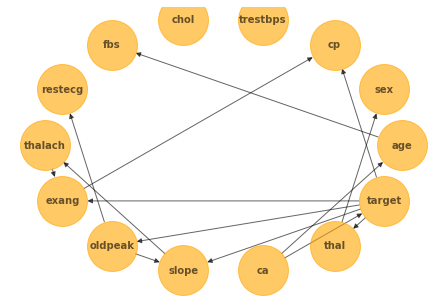

In [51]:
#Visual representation of network structure
nx.draw_circular(bdeu_estimated_model, with_labels=True, arrowsize=10,node_color = 'orange', node_size=2500, alpha=0.6, font_size = 10, font_weight='bold')
plt.show()

In [52]:
#BDeu Score for estimated model
bdeu_score = scoring_method_bdeu.score(bdeu_estimated_model)

In [53]:
# Table for Hill-Climb Search Algorith Scores
train_score_table = pd.DataFrame({'Hill-Climb Search' : [k2_score, bdeu_score, bic_score]},
            index=['K2 Score', 'BDeu Score','Bic Score'])
train_score_table

,Hill-Climb Search
K2 Score,-2487.893035
BDeu Score,-2491.881750
Bic Score,-2522.727980


Based on the scoring method estimates it is maximum for K2 Score.


### d) Performance metrics for training

We will be creating the model using the structure obtained in above section for K2 Score. Looking at the network model for K2 estimated model, noted that 'chol', 'trestbps' and 'restecg' nodes are not used.

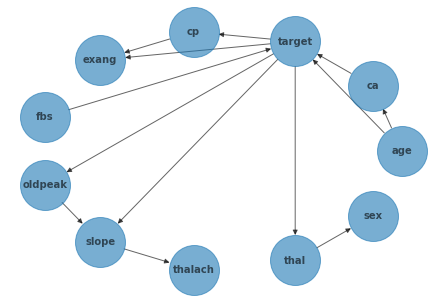

In [54]:
#Creating the Bayesian Model for Heart Disease on the basis of the network structure obtained above using K2 Score for Hill-Climb Search Algorithm
k2_network_structure = BayesianModel([('age', 'ca'), ('age', 'target'), ('cp', 'exang'), ('fbs', 'target'), ('oldpeak', 'slope'), ('slope', 'thalach'), ('ca', 'target'), ('thal', 'sex'), ('target', 'thal'), ('target', 'cp'), ('target', 'oldpeak'), ('target', 'exang'), ('target', 'slope')])

#visual representation of the model
nx.draw_circular(k2_network_structure, with_labels=True, arrowsize=10, node_size=2500, alpha=0.6, font_size = 10, font_weight='bold')
plt.show()

We will be learning the CPTs for the given model using Bayesian Estimator and prior_type K2. Please note that different techniques for learning model parameters (CPTs)have been discussed in Section 4. Hence we will only be selecting one technique in this section.

In [55]:
#learning CPTs using prior_type 'K2' and Bayesian Estimator. 
k2_network_structure.cpds = []
k2_network_structure.fit(data=hd_data_train, 
          estimator=BayesianEstimator,
          prior_type="K2")

print(f'Check model: {k2_network_structure.check_model()}\n')
for cpd in k2_network_structure.get_cpds():
    print(f'CPT of {cpd.variable}:')
    print(cpd, '\n')

Check model: True

CPT of age:
+--------+----------+
| age(0) | 0.183333 |
+--------+----------+
| age(1) | 0.683333 |
+--------+----------+
| age(2) | 0.133333 |
+--------+----------+ 

CPT of ca:
+-------+---------------------+---------------------+---------------------+
| age   | age(0)              | age(1)              | age(2)              |
+-------+---------------------+---------------------+---------------------+
| ca(0) | 0.8297872340425532  | 0.5329341317365269  | 0.4                 |
+-------+---------------------+---------------------+---------------------+
| ca(1) | 0.10638297872340426 | 0.23353293413173654 | 0.2857142857142857  |
+-------+---------------------+---------------------+---------------------+
| ca(2) | 0.0425531914893617  | 0.1497005988023952  | 0.17142857142857143 |
+-------+---------------------+---------------------+---------------------+
| ca(3) | 0.02127659574468085 | 0.08383233532934131 | 0.14285714285714285 |
+-------+---------------------+-----------

In [56]:
#removing column 'chol', 'trestbps' and 'restecg' from training data as these nodes are not a part of model structure
train_predict2 = X_train.copy()
train_predict2.drop(['chol', 'trestbps', 'restecg'],axis=1, inplace=True)

#predicting the target value for training data
y_pred_train_NS = k2_network_structure.predict(train_predict2)

#calculating F1 and Accuracy Score for training data
score_F1_NS = f1_score(y_train, y_pred_train_NS)
score_A_NS = accuracy_score(y_train, y_pred_train_NS)

#displaying the score table
training_score_table = pd.DataFrame({'Hill Climb Search' : [score_F1_NS, score_A_NS]},
            index=['F1 Score', 'Accuracy Score'])
training_score_table

,Hill Climb Search
F1 Score,0.841629
Accuracy Score,0.852321


## 6. Comparison of metrics performance for testing 
Enter the correct code in the cells below to execute each of the stated sub-tasks. 


### a) Examining over-fitting

Maximum Likelihood Estimator has the problem of overfitting to the data as it uses the relative frequencies, with which the variable states have occured. 

Therefore, we have used Bayesian Estimator which starts with already existing prior CPDs, that express our beliefs about the variables before the data was observed. Those “priors” are then updated, using the state counts from the observed data. Hence, by using Bayesian Estimator for parameter learning, we have dealt with overfitting.

### b) Comparison with appropriate metrics for testing

#### Network from Research Paper from Section 4

In [57]:
#removing column 'chol', 'fbs' and 'restecg' from test data as these nodes are not a part of model structure
predict_data_T1 = X_test.copy()
predict_data_T1.drop(['chol', 'fbs', 'restecg'],axis=1, inplace=True)

#predicting the target value for test data
y_pred_T1 = bdeu_research_model.predict(predict_data_T1)

#calculating different scores for testing data
score_F1_T1 = f1_score(y_test, y_pred_T1)
score_A_T1 = accuracy_score(y_test, y_pred_T1)
score_ROC_T1 = roc_auc_score(y_test, y_pred_T1)
score_Recall_T1 = recall_score(y_test, y_pred_T1)
score_PR_T1 = precision_score(y_test, y_pred_T1)

#displaying the score table
test_score_table_T1 = pd.DataFrame({'Network from Research Paper' : [score_F1_T1, score_A_T1, score_ROC_T1, score_Recall_T1, score_PR_T1 ]},
            index=['F1 Score', 'Accuracy Score', 'Area Under Curve ROC', 'Recall Score', 'Precision Score'])
test_score_table_T1

,Network from Research Paper
F1 Score,0.897959
Accuracy Score,0.916667
Area Under Curve ROC,0.916667
Recall Score,0.916667
Precision Score,0.880000


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

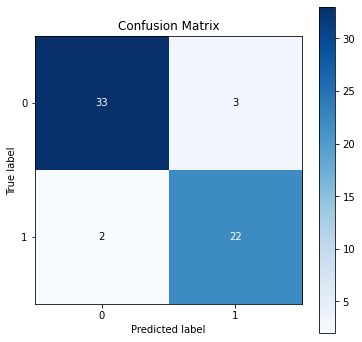

In [58]:
#displaying the confusion matrix for test data
skplt.metrics.plot_confusion_matrix(y_test, y_pred_T1, figsize=(6,6))

#### Learnt Network Structure from Section 5

In [59]:
#removing column 'chol', 'trestbps' and 'restecg' from test data as these nodes are not a part of model structure
predict_data_T2 = X_test.copy()
predict_data_T2.drop(['chol', 'trestbps', 'restecg'],axis=1, inplace=True)

#predicting the target value for test data
y_pred_T2 = k2_network_structure.predict(predict_data_T2)

#calculating different scores for testing data
score_F1_T2 = f1_score(y_test, y_pred_T2)
score_A_T2 = accuracy_score(y_test, y_pred_T2)
score_ROC_T2 = roc_auc_score(y_test, y_pred_T2)
score_Recall_T2 = recall_score(y_test, y_pred_T2)
score_PR_T2 = precision_score(y_test, y_pred_T2)

#displaying the score table
test_score_table_T2 = pd.DataFrame({'Learnt Network Structure' : [score_F1_T2, score_A_T2, score_ROC_T2, score_Recall_T2, score_PR_T2]},
            index=['F1 Score', 'Accuracy Score', 'Area Under Curve ROC', 'Recall Score', 'Precision Score'])
test_score_table_T2

,Learnt Network Structure
F1 Score,0.826087
Accuracy Score,0.866667
Area Under Curve ROC,0.854167
Recall Score,0.791667
Precision Score,0.863636


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

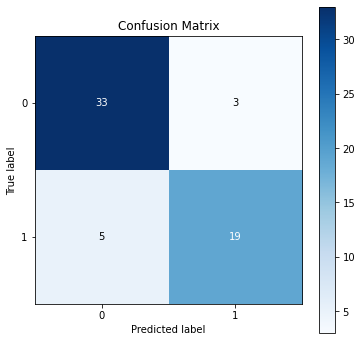

In [60]:
#displaying the confusion matrix for test data
skplt.metrics.plot_confusion_matrix(y_test, y_pred_T2, figsize=(6,6))

### c) Model selection

On the basis of the scoring table, network structure obtained from research paper and learning of CPTs done on it in Section 4 is a better model.

In [61]:
#displaying the scoring table

test_scores_table = pd.DataFrame({'Network from Research Paper' : [score_F1_T1, score_A_T1, score_Recall_T1, score_PR_T1, score_ROC_T1 ],
                                    'Learnt Network Structure': [score_F1_T2, score_A_T2, score_Recall_T2, score_PR_T2, score_ROC_T2]},
                                      index=['F1 Score', 'Accuracy', 'Recall', 'Precision', 'Area Under Curve ROC'])
test_scores_table['Best Score'] = test_scores_table.idxmax(axis=1)

test_scores_table

,Network from Research Paper,Learnt Network Structure,Best Score
F1 Score,0.897959,0.826087,Network from Research Paper
Accuracy,0.916667,0.866667,Network from Research Paper
Recall,0.916667,0.791667,Network from Research Paper
Precision,0.880000,0.863636,Network from Research Paper
Area Under Curve ROC,0.916667,0.854167,Network from Research Paper


## 7. Final recommendation of best model

We will be analysing and basing the final recommendations on the basis of the model selected by splitting the data into train and test and then performing hyperparameter tuning on training data to obtain the best model and then obtaining the performance metrics for that best model on test data. 

We. have mainly focussed on learning the parameters in section 4 and learning the network structure in section 5.

### a) Discuss the results from a technical perspective, for example, overfitting discussion, complexity and efficiency

-  <b>Overfitting</b> - Bayesian Estimator has been used in both the techniques, hence the problem of overfitting for graphical models has been dealt with..
-  <b>Complexity</b> - Both the models have 13 edges and 11 nodes, hence complexity is similar.
-  <b>Efficiency</b> - This can be evaluated in terms of F1 score and accuracy. On the test data, network obtained from research paper  has a better F1 score and accuracy. 

Hence, keeping in mind the above data points,<b> network structure obtained from research and learning of CPTs on it in section 4 </b>is a better model.


### b) Discuss the results from a business perspective, for example, results interpretation, relevance and balance with technical perspective

The main focus of the case study is to classify if the patient has heart disease or not based on the given medical symptoms and parameters. Hence looking at the confusion matrix and accuracy score we can conclude that <b> network structure obtained from research and learning of CPTs on it in section 4 </b>is a better model. 

On the basis of structure obtained, we were able to conclude that medical parameters for cholestrol 'chol', fasting blood sugar 'fbs' and resting ecg results 'restecg' did not play any role in the prediction of the heart disease.

## 8. Conclusion

### a) What has been successfully accomplished and what has not been successful?
#### Successfully Accomplished 
- Learnt model parameters for existing network structure with hyper parameter tuning to select best parameters for estimating CPTs on training data using log likelikood score. Estimators used were Bayesian Estimator and Maximum Likelihood Estimator
- Learnt structure of the network from training data using Hill Climb Search Algorithm with hyper parameter tuning on different scoring methods - K2 Score, Bic Score and BDeu Score. Then learning the model parameters on the best structure obtained.
- Identification of one best model on the basis of performance metrics obtained on testing data .
- Ability to predict heart disease occurence through both the models.

#### Not Successfully Accomplished
- Could have done hyper parameter tuning for learning model parameters in network structure obatined in section 5, but could not do it due to paucity of time.

### b) Reflecting back on the analysis, what could you have done differently if you were to do the project again?

I would have liked to compare the graphical model with Logistic Regression or Neural Network or SVM and see how these techniques compare with each other.

### c) Provide a wish list of future work that you would like to do

1. Implement more models for binary classification like neural networks, SVM, Logistic Regression
2. Extend this approach of using graphical models to predict other diseases as well
3. Medical science seems like a very good application for graphical models, would definitely like to do more detailed research and analysis on different datasets and explore how we can use these models in the real world and help doctors in diagnosis.